In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Логистическая регрессия

Пусть
$$
{\rm Pr}(Y=1 \mid X=x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \dots + \beta_d x_d)}} 
                = \sigma(\beta_0 + \beta_1 x_1 + \dots + \beta_d x_d)
$$

Элементарная логистическая функция (элементарный сигмоид):
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

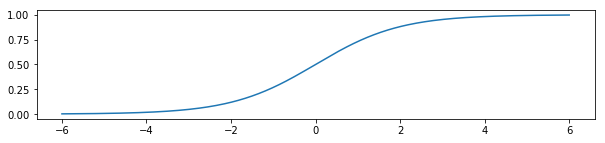

In [2]:
plt.figure(figsize = (10, 2))
z = np.linspace(-6, 6, 300)
sigma = 1/(1 + np.exp(-z))
plt.plot(z, sigma)

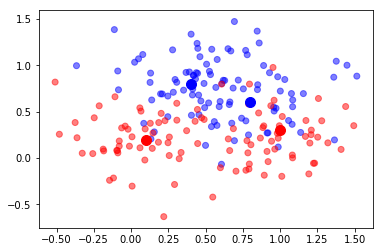

In [3]:
import mysk

X, y = mysk.generate_points(seed = 0)
mysk.draw_points(X, y)
mysk.draw_centers()

In [4]:
X_test, y_test = mysk.generate_points(seed = 1)

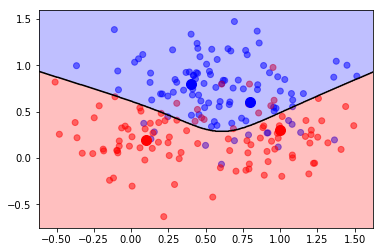

In [5]:
mysk.draw_points(X, y)
mysk.draw_centers()
mysk.draw_bayes_sep_curve()

In [6]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

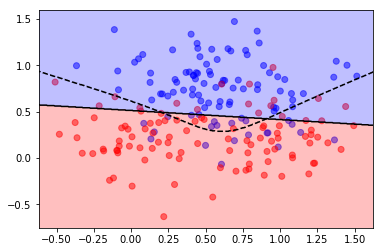

In [7]:
mysk.draw_points(X, y)
mysk.draw_sep_curve(logistic_model)
mysk.draw_bayes()

In [8]:
err_train = np.mean(y != logistic_model.predict(X))
err_test = np.mean(y_test != logistic_model.predict(X_test))
print(err_train, err_test)

0.2 0.23


In [9]:
print(logistic_model.coef_) # Коэффициенты разделяющей гиперплоскости
print(logistic_model.intercept_)

[[-0.36951362 -3.77113361]]
[ 1.9344901]


## Случай $K$ классов


Пусть

$$
{\rm Pr}(Y=k \mid X=x) = \frac{e^{\beta_{k0} + \beta_{k1} x_1 + \dots + \beta_{kd} x_d}}{\sum_{\ell=1}^K e^{\beta_{\ell 0} + \beta_{\ell 1} x_1 + \dots + \beta_{\ell d} x_d}} 
=
\frac{e^{\beta_{k0} + \beta_k^{\rm T} x}}{\sum_{\ell=1}^K e^{\beta_{\ell 0} + \beta_{\ell}^{\rm T} x}}
\qquad
(k = 1,2,\dots,K)
$$

Преобразуем и переобозначим:

$$
{\rm Pr}(Y=k \mid X=x) = 
\frac{e^{\beta_{k0} + \beta_k^{\rm T} x}}{1 + \sum_{\ell=1}^{K-1} e^{\beta_{\ell 0} + \beta_{\ell}^{\rm T} x}}
\qquad
(k = 1,2,\dots,K-1),
\qquad
{\rm Pr}(Y=K \mid X=x) = 
\frac{1}{1 + \sum_{\ell=1}^{K-1} e^{\beta_{\ell 0} + \beta_{\ell}^{\rm T} x}}
$$

Разделяющие поверхности линейные:

$$
{\rm Pr}(Y=k \mid X=x) = {\rm Pr}(Y=K \mid X=x) 
\quad\Leftrightarrow\quad 
e^{\beta_{k0} + \beta_k^{\rm T} x} = 1
\quad\Leftrightarrow\quad 
\beta_{k0} + \beta_k^{\rm T} x = 0
$$

$$
{\rm Pr}(Y=k \mid X=x) = {\rm Pr}(Y=k' \mid X=x)
\quad\Leftrightarrow\quad 
e^{\beta_{k0} + \beta_k^{\rm T} x} = e^{\beta_{k'0} + \beta_{k'}^{\rm T} x}
\quad\Leftrightarrow\quad 
\beta_{k0} + \beta_k^{\rm T} x = \beta_{k'0} + \beta_{k'}^{\rm T} x
$$


## Расчет параметров

В логистической регрессии параметры обычно подбираются с помощью метода максимального правдоподобия. 

_Логарифмическая функция правдоподобия_
$$
\ell(\beta) = \sum_{i=1}^N \ln {\rm Pr}\{Y = y^{(i)} \mid X = x^{(i)}, \beta\} \to \max,
$$
где
$$
\beta = (\beta_{10},\beta_1,\beta_{20},\beta_2,\dots,\beta_{K-1,0},\beta_{K-1}),
\quad
\Pr(Y = k\mid X = x, \beta) = \Pr(Y=k\mid X=x).
$$


Подробно рассмотрим случай $K=2$: ${\cal Y} =\{0,1\}$.


$$
g(x,\beta) = \Pr\{Y = 1\mid X = x, \beta\} = \frac{1}{1+e^{-\beta_0 - \beta^{\rm T} x}}.
$$

Требуется максимизировать логарифмическую функцию правдоподобия 
$$
\ell(\beta) = \sum_{i=1}^N \Bigl( y^{(i)} \ln g(x^{(i)},\beta) + (1-y^{(i)})\ln\bigl(1-g(x^{(i)},\beta)\bigr)\Bigr).
$$

Легко доказать (проверьте!), что
$$
\frac{\partial\ell(\beta)}{\partial\beta_0} = \sum_{i=1}^N \left(y^{(i)} - f(x^{(i)},\beta)\right),
\qquad
\frac{\partial\ell(\beta)}{\partial\beta_j} = \sum_{i=1}^N \left(y^{(i)} - f(x^{(i)},\beta)\right) x_j^{(i)}.
$$

Теперь можем воспользоваться методом градиентного спуска или более продвинутым методом оптимизации (сопряженных градиентов, BFGS, L-BFGS и др.).

*Замечание*

Легко видеть, что максимизация логарифмической функции правдоподобия эквивалентна минимизации эмпирического риска
$$
\widehat{R}(\beta) = -\frac{1}{N} \ell(\beta) 
= -\frac{1}{N}\sum_{i=1}^N \Bigl( y^{(i)} \ln g(x^{(i)},\beta)+(1-y^{(i)})\ln\bigl(1-g\bigl(x^{(i)},\beta)\bigr)\Bigr),
$$ 
если в качестве штрафной функции рассмотреть _кросс-энтропию_:
$$
L\bigl(g(x,\beta), y\bigr) = -y \ln g(x,\beta) - (1-y)\ln\bigl(1-g(x,\beta)\bigr).
$$